In [39]:
import os
import cv2
import tqdm
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seamcarving as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


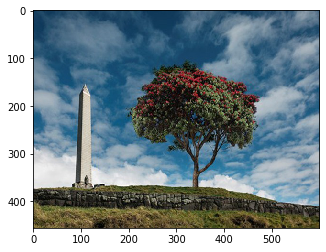

In [40]:
# load image
image_name = "a.jpg"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
sc.show_image_plt(image)

100%|██████████| 200/200 [00:05<00:00, 39.50it/s]


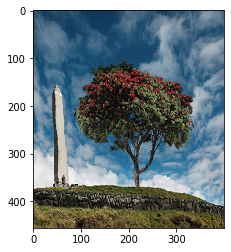

In [41]:
# remove seams normally
current_image = np.copy(image)
for i in tqdm.tqdm(range(200)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
sc.show_image_plt(current_image)

100%|██████████| 200/200 [00:06<00:00, 32.97it/s]


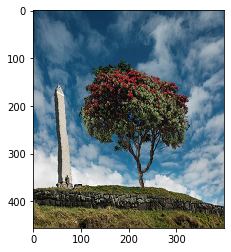

In [42]:
# remove with diffusion
current_image = np.copy(image)
current_energy = sc.laplacian_energy(current_image)
current_delta = np.zeros_like(current_energy)
for i in tqdm.tqdm(range(200)):
    current_seam = sc.seam_with_minimum_energy(current_energy + current_delta)
    current_image = sc.remove_seam(current_image, current_seam)
    current_delta = sc.diffusion_delta(current_energy, current_seam, p=1) + current_delta
    current_delta = sc.remove_seam(current_delta, current_seam)
    current_energy = sc.laplacian_energy(current_image)
sc.show_image_plt(current_image)